# Analysing Data - Assignment 1
Henry Alexander Hornung (S4156145)

## Downloading and Importing Modules

In [1]:
# Ensuring that all necessary packages and resources are downloaded
!pip install matplotlib
!pip install pandas
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm
!python -m spacy download nl_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 4.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 19.1 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.1 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('nl_core_news_sm')


In [2]:
# Importing packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import re

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
nltk.download('punkt')

import spacy
from spacy import displacy

[nltk_data] Downloading package punkt to /Users/henry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Part 1

#### Exercise 1
Perform sentence splitting and word tokenization. Report the statistics of word frequency (per story and in total) in a python dictionary, plot the 25 most common words (per story and in total) in the form of a histogram. 

In [3]:
# Importing files for part 1
part1 = []
for filename in os.listdir("Part_I_1-2/"):
    if filename != ".DS_Store":
        with open("Part_I_1-2/" + filename, encoding = "utf-8") as file:
            content = file.read()
        part1.append(content)

In [4]:
# Removing title from each text, saving it under metadata list
metadata = []
for index, text in enumerate(part1):
    metadata.append(text.split("---")[0])
    if "---" in text:
        part1[index] = text.split("---")[1]

In [5]:
# Sentence tokenizing
part1_sent = []
for text in part1:
    part1_sent.append(sent_tokenize(text))

# Word tokenizing
part1_word = []
for text in part1:
    part1_word.append(word_tokenize(text))

In [6]:
# Word frequencies function
def getwf(text):
    wf = {}
    punct = "“”.,?'’!''``"
    
    # Getting the total occurances of each word
    for word in text:
        if word not in punct:
            if word.lower() not in wf.keys():
                wf[word.lower()] = 1
            else:
                wf[word.lower()] += 1

    # Transforming the word counts into word frequencies
    total_words = len(wf.keys())
    for word, occurances in wf.items():
        wf[word] = occurances/total_words

    # Sorting them from highest to lowest, including only the top 25 most common words.
    wf = dict(sorted(wf.items(), key=lambda x: x[1], reverse=True)[:25])
    
    return wf

In [7]:
# Word frequencies total
word_total = []
for text in part1_word:
    for word in text:
        word_total.append(word)

wf_total = getwf(word_total)

In [8]:
# Word frequencies per story
wf_01 = getwf(part1_word[0])
wf_02 = getwf(part1_word[1])
wf_03 = getwf(part1_word[2])
wf_04 = getwf(part1_word[3])
wf_05 = getwf(part1_word[4])

In [9]:
# Word frequencies total
word_total = []
for text in part1_word:
    for word in text:
        word_total.append(word)

wf_total = getwf(word_total)

In [10]:
# Function to create/export the histogram
def get_wf_hist(dictionary, title, file_name):
    words = list(dictionary.keys())
    frequencies = list(dictionary.values())
    
    plt.figure(figsize=(12, 4))
    plt.bar(words, frequencies)
    plt.title(title)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    filepath = os.path.join("Figures", file_name)
    
    return (plt.savefig(filepath), plt.show())

In [11]:
# Function to ouput the frequencies in a df
def createDF(wf_list):
    wf_df = pd.DataFrame()

    for dictionary, text in wf_list:
        # Saving the words and frequencies as pd series respectively
        words = pd.Series(dictionary.keys(), name = text + " words")
        frequencies = pd.Series(dictionary.values(), name = text + " freq")
    
        # Adding the series to a df, and subsequently concating this with the final df
        temp_df = pd.concat([words, frequencies], axis = 1)
        wf_df = pd.concat([wf_df, temp_df], axis = 1)
    
    # Displaying the final df
    return wf_df

In [12]:
# Saving each frequency dictionary in a tuple with its corresponding text to assign the titles of the columns
wf_list = [(wf_01, "Text 1"), (wf_02, "Text 2"), (wf_03, "Text 3"), (wf_04, "Text 4"), (wf_05, "Text 5"), (wf_total, "Total")]

# Displaying the most frequent words, along with their frequencies
createDF(wf_list).head()

,Text 1 words,Text 1 freq,Text 2 words,Text 2 freq,Text 3 words,Text 3 freq,Text 4 words,Text 4 freq,Text 5 words,Text 5 freq,Total words,Total freq
0,the,0.114865,she,0.234432,the,0.123267,the,0.201550,you,0.234101,the,0.190782
1,her,0.081081,her,0.076923,her,0.086287,to,0.129199,the,0.121659,you,0.177946
2,river,0.074324,the,0.073260,he,0.086287,he,0.108527,your,0.112442,to,0.138856
3,missy,0.067568,him,0.058608,to,0.084746,was,0.077519,to,0.103226,she,0.124854
4,a,0.067568,t,0.054945,and,0.072419,doctor,0.077519,and,0.077419,her,0.111435


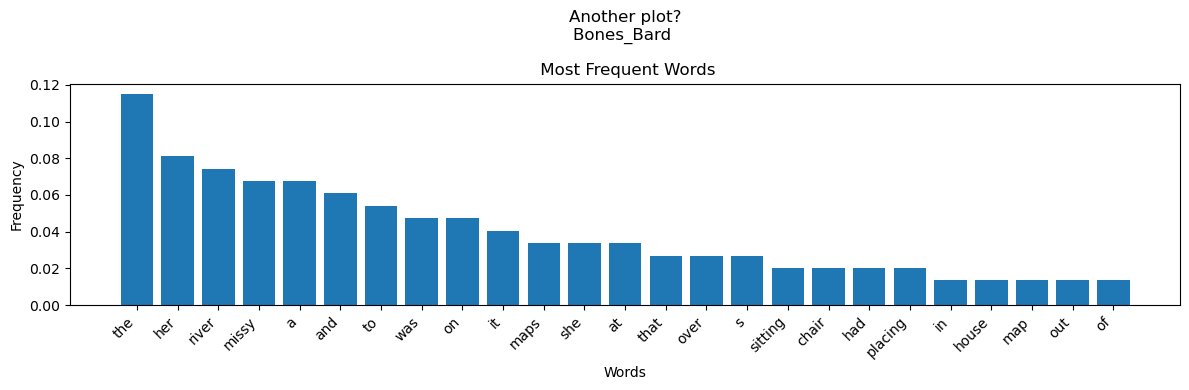

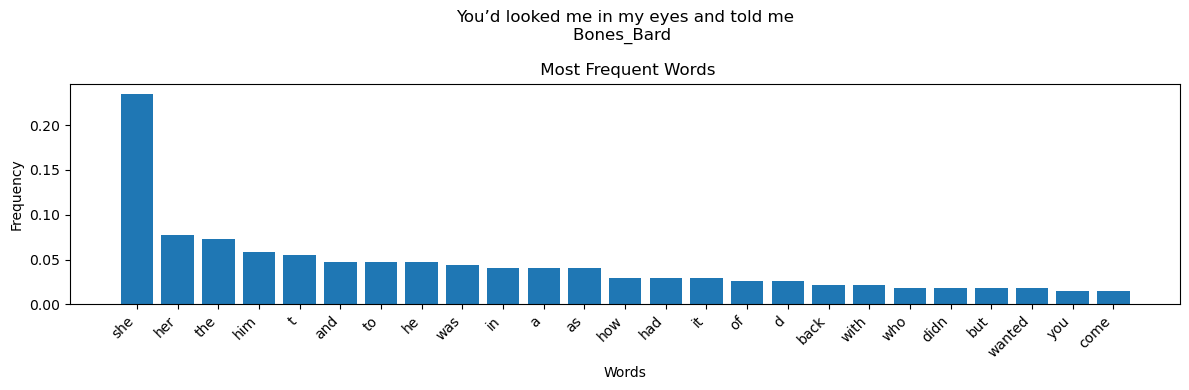

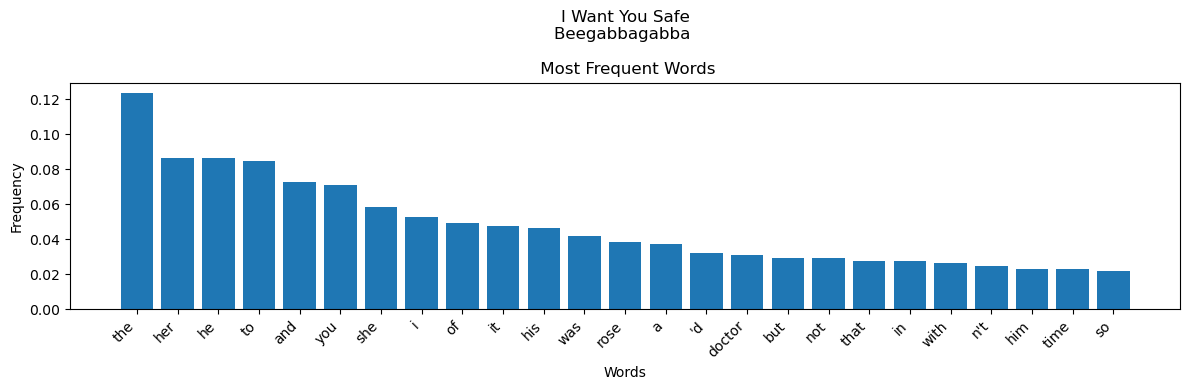

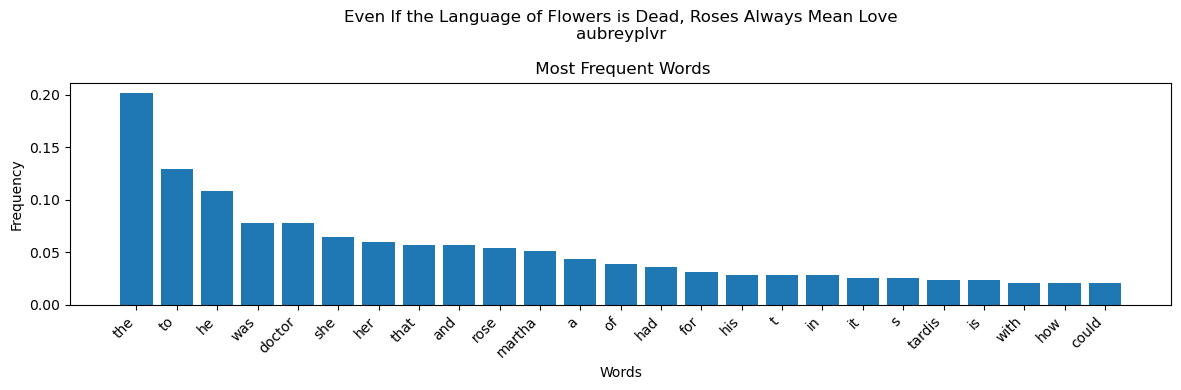

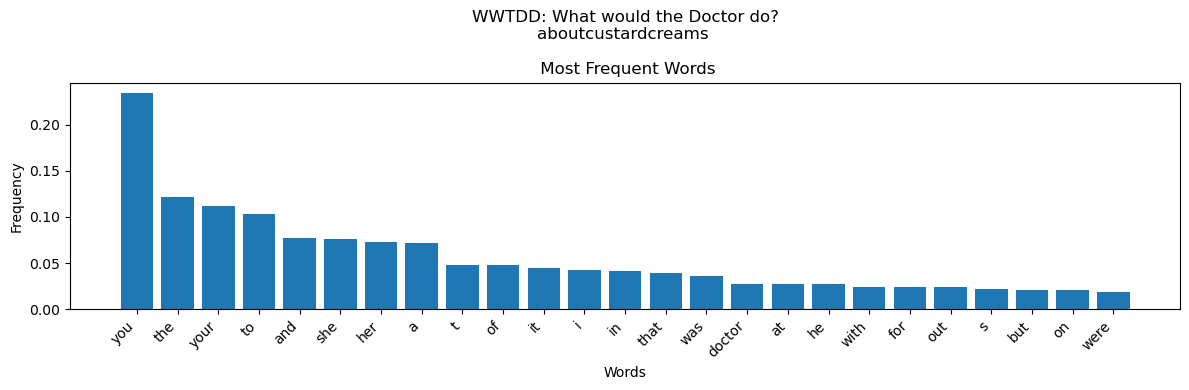

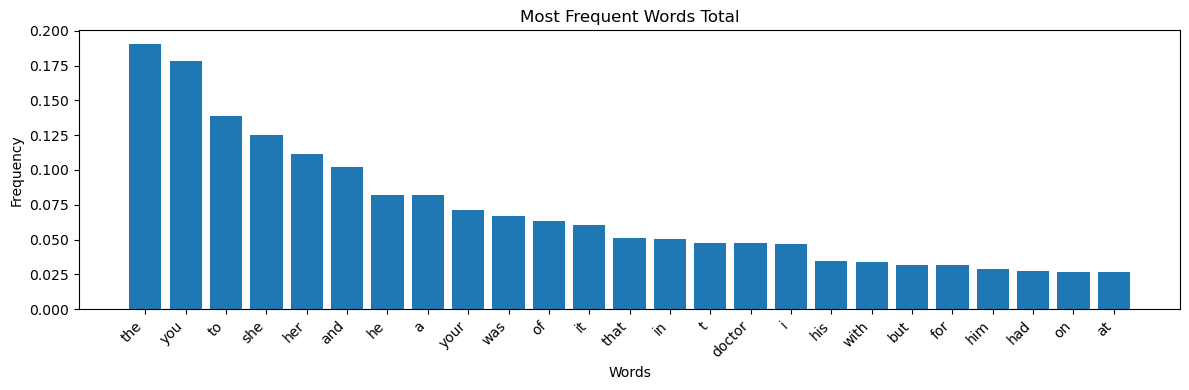

(None, None)

In [13]:
# Outputting each histogram
get_wf_hist(wf_01, metadata[0]+" Most Frequent Words", "fig1")
get_wf_hist(wf_02, metadata[1]+" Most Frequent Words", "fig2")
get_wf_hist(wf_03, metadata[2]+" Most Frequent Words", "fig3")
get_wf_hist(wf_04, metadata[3]+" Most Frequent Words", "fig4")
get_wf_hist(wf_05, metadata[4]+" Most Frequent Words", "fig5")
get_wf_hist(wf_total, "Most Frequent Words Total", "fig6")

#### Exercise 2
Perform stemming on the text using the Porter and Lancaster stemmer. Re-create the statistics and the plot from 1. Compare the differences between the stemmed and unstemmed results, and discuss the difference in the results of the two stemmers.

In [14]:
# Function to apply porter stemmer to list of words
def Pstemmer(tokenized_text):
    Porter = PorterStemmer()
    stemmed_words = []
    
    for word in tokenized_text:
        stemmed_words.append(Porter.stem(word))
    
    return stemmed_words

In [15]:
# Function to apply lancaster stemmer to list of words
def Lstemmer(tokenized_text):
    Lancaster = LancasterStemmer()
    stemmed_words = []
    
    for word in tokenized_text:
        stemmed_words.append(Lancaster.stem(word))
    
    return stemmed_words

In [16]:
# Applying both stemmers to the texts
porter_01 = Pstemmer(part1_word[0])
porter_02 = Pstemmer(part1_word[1])
porter_03 = Pstemmer(part1_word[2])
porter_04 = Pstemmer(part1_word[3])
porter_05 = Pstemmer(part1_word[4])
porter_total = Pstemmer(word_total)

lancaster_01 = Lstemmer(part1_word[0])
lancaster_02 = Lstemmer(part1_word[1])
lancaster_03 = Lstemmer(part1_word[2])
lancaster_04 = Lstemmer(part1_word[3])
lancaster_05 = Lstemmer(part1_word[4])
lancaster_total = Lstemmer(word_total)

In [17]:
# Getting the word frequencies for each stemmed text
porter_wf_01 = getwf(porter_01)
porter_wf_02 = getwf(porter_02)
porter_wf_03 = getwf(porter_03)
porter_wf_04 = getwf(porter_04)
porter_wf_05 = getwf(porter_05)
porter_wf_total = getwf(porter_total)

lancaster_wf_01 = getwf(lancaster_01)
lancaster_wf_02 = getwf(lancaster_02)
lancaster_wf_03 = getwf(lancaster_03)
lancaster_wf_04 = getwf(lancaster_04)
lancaster_wf_05 = getwf(lancaster_05)
lancaster_wf_total = getwf(lancaster_total)

In [18]:
# Outputting the porter-stemmed frequencies in df
porter_list = [(porter_wf_01, "Text 1"), (porter_wf_02, "Text 2"), (porter_wf_03, "Text 3"), (porter_wf_04, "Text 4"), (porter_wf_05, "Text 5"), (porter_wf_total, "Total")]

createDF(porter_list).head()

,Text 1 words,Text 1 freq,Text 2 words,Text 2 freq,Text 3 words,Text 3 freq,Text 4 words,Text 4 freq,Text 5 words,Text 5 freq,Total words,Total freq
0,the,0.124088,she,0.247104,the,0.136752,the,0.214286,you,0.267368,the,0.229313
1,her,0.087591,her,0.081081,her,0.097436,to,0.137363,the,0.138947,you,0.213885
2,river,0.080292,the,0.077220,he,0.095726,he,0.115385,your,0.130526,to,0.166900
3,missi,0.072993,him,0.061776,to,0.094017,wa,0.082418,to,0.117895,she,0.150070
4,a,0.072993,t,0.057915,and,0.080342,doctor,0.082418,and,0.088421,her,0.136045


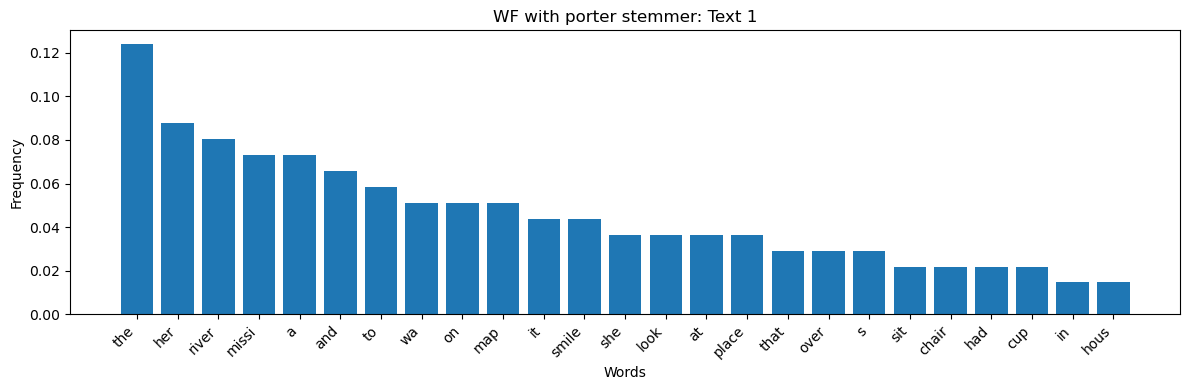

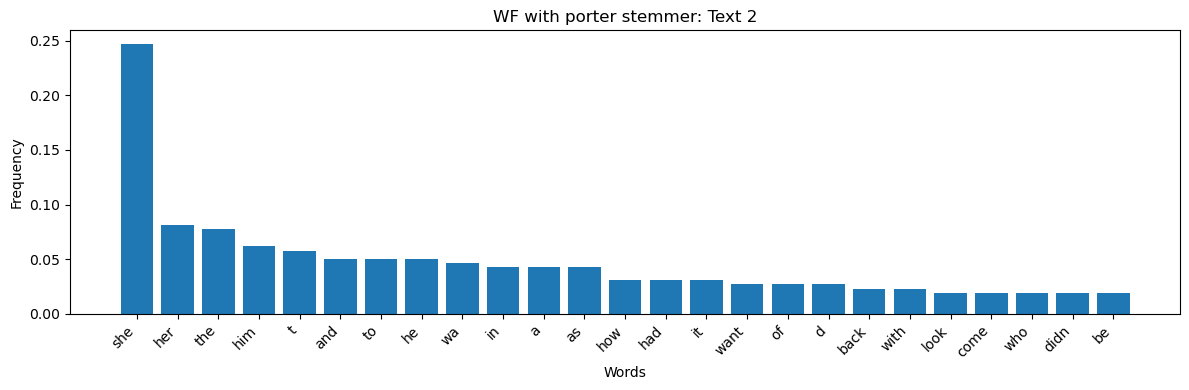

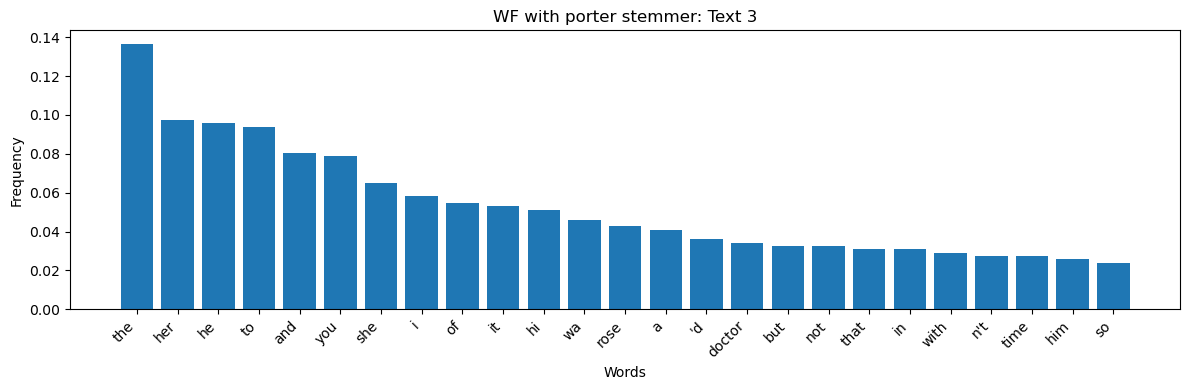

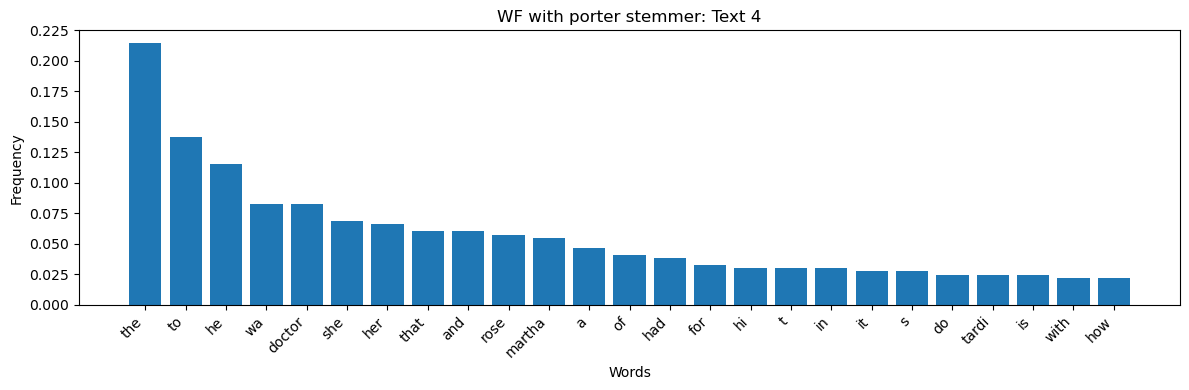

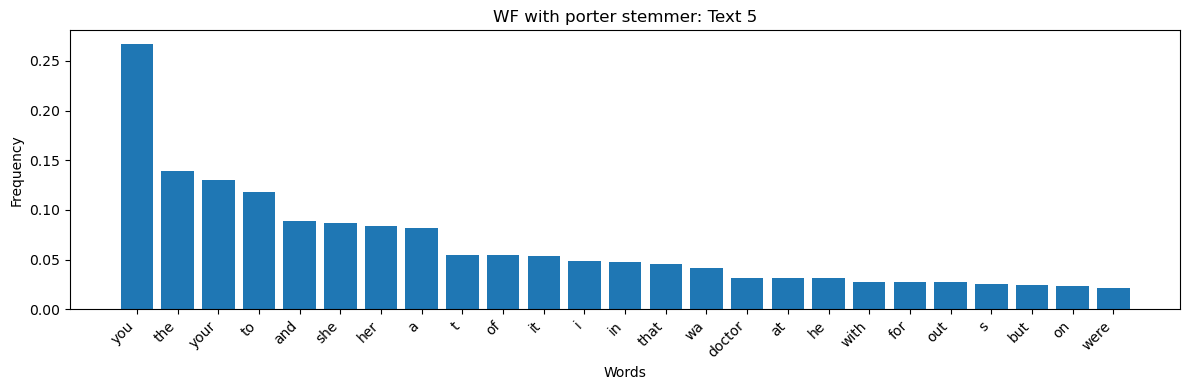

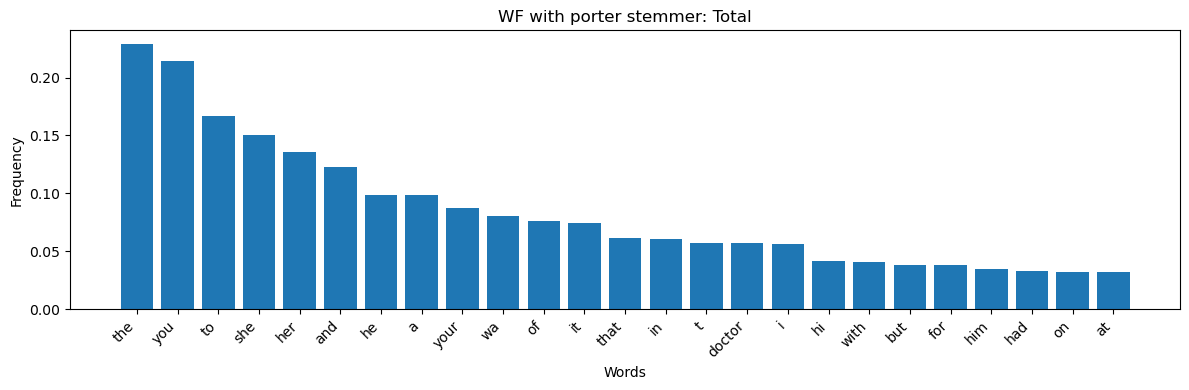

In [19]:
# Generating the histograms for the porter-stemmed texts
porter_wfs = [porter_wf_01, porter_wf_02, porter_wf_03, porter_wf_04, porter_wf_05, porter_wf_total]
n = 7

for index, wf in enumerate(porter_wfs):
    if index <= 4:
        get_wf_hist(wf, "WF with porter stemmer: Text " + str(index+1), f"fig{n}")
        n += 1
    else:
        get_wf_hist(wf, "WF with porter stemmer: Total", f"fig{n}")

In [20]:
# Doing the same for the lancaster-stemmed texts
lancaster_list = [(lancaster_wf_01, "Text 1"), (lancaster_wf_02, "Text 2"), (lancaster_wf_03, "Text 3"), (lancaster_wf_04, "Text 4"), (lancaster_wf_05, "Text 5"), (lancaster_wf_total, "Total")]

createDF(lancaster_list).head()

,Text 1 words,Text 1 freq,Text 2 words,Text 2 freq,Text 3 words,Text 3 freq,Text 4 words,Text 4 freq,Text 5 words,Text 5 freq,Total words,Total freq
0,the,0.124088,she,0.251969,the,0.140598,the,0.221591,you,0.279736,the,0.244030
1,her,0.087591,her,0.090551,her,0.100176,to,0.142045,the,0.145374,you,0.227612
2,riv,0.080292,the,0.078740,he,0.098418,he,0.119318,yo,0.136564,to,0.177612
3,missy,0.072993,him,0.062992,to,0.096661,was,0.085227,to,0.123348,she,0.159701
4,a,0.072993,t,0.059055,and,0.082601,doct,0.085227,and,0.092511,her,0.147015


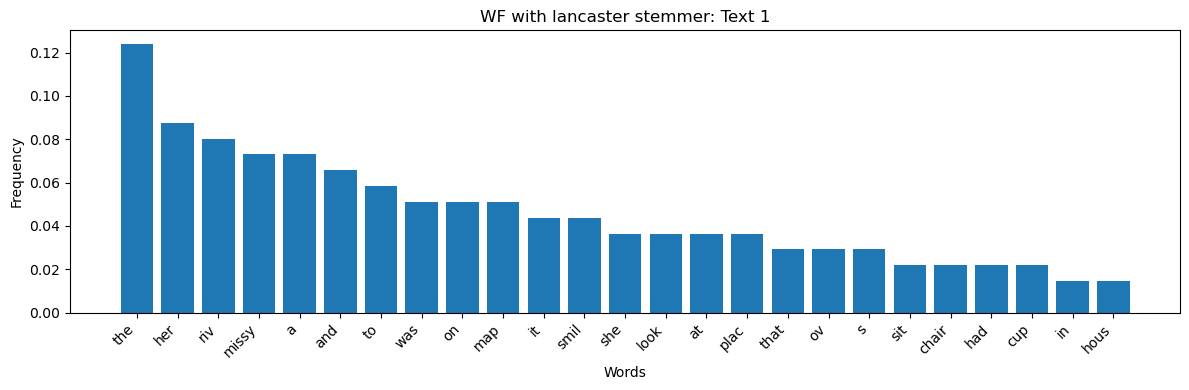

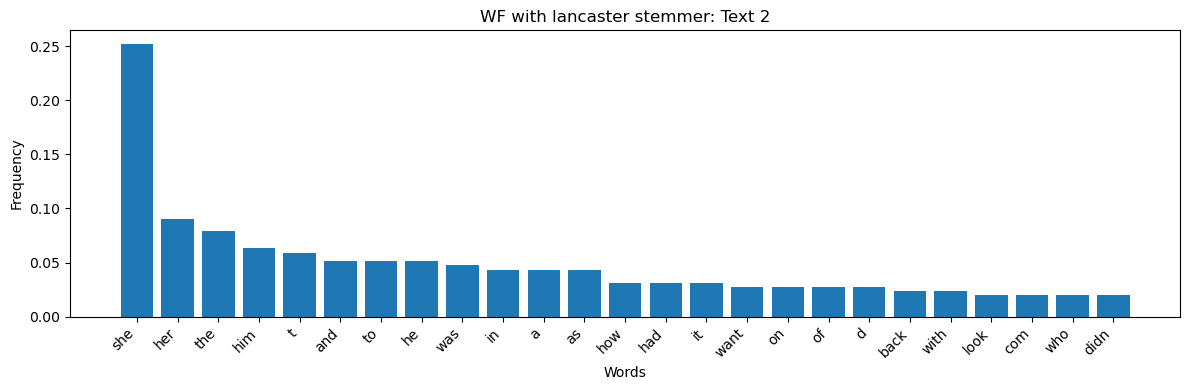

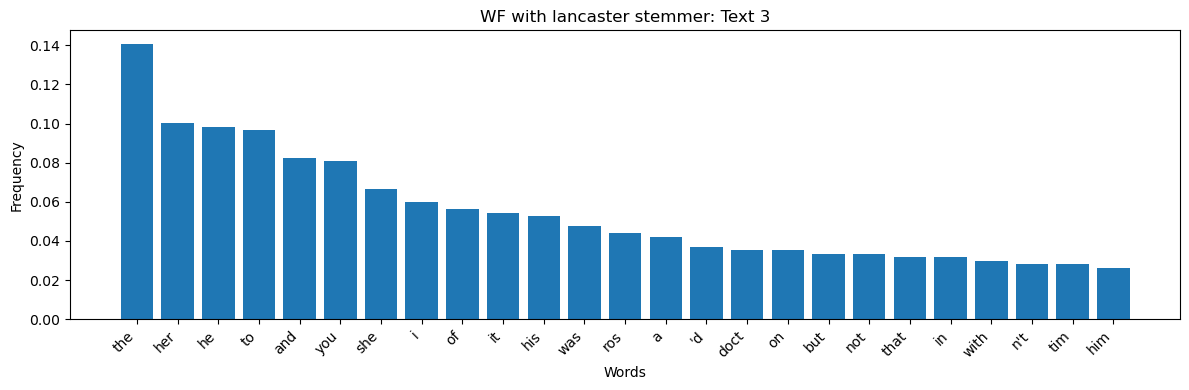

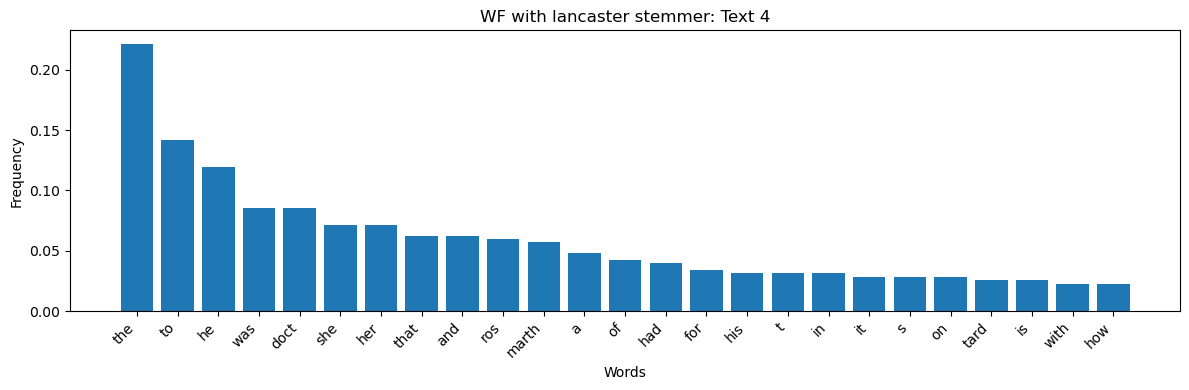

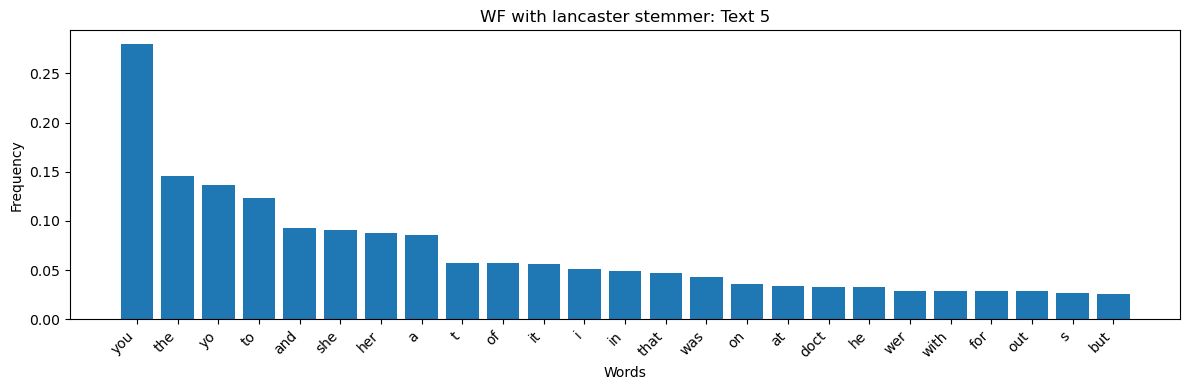

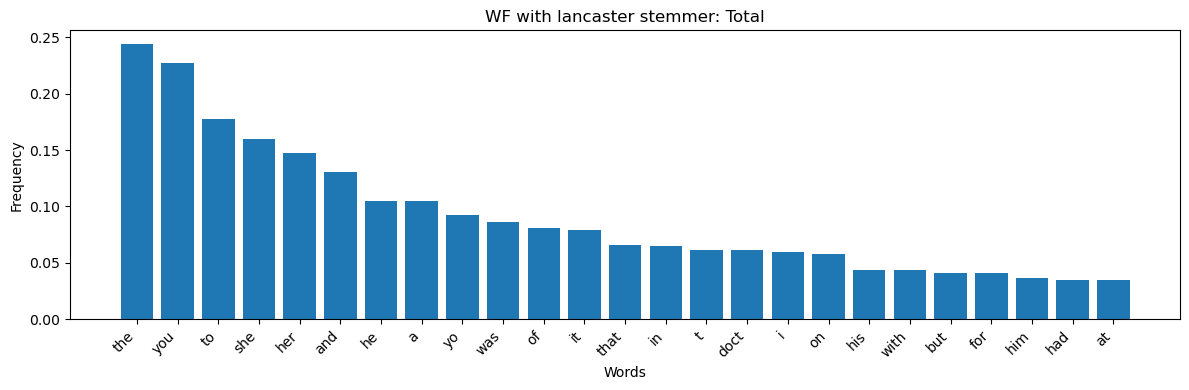

In [21]:
lancaster_wfs = [lancaster_wf_01, lancaster_wf_02, lancaster_wf_03, lancaster_wf_04, lancaster_wf_05, lancaster_wf_total]
n = 13

for index, wf in enumerate(lancaster_wfs):
    if index <= 4:
        get_wf_hist(wf, "WF with lancaster stemmer: Text " + str(index+1), f"fig{n}")
        n += 1
    else:
        get_wf_hist(wf, "WF with lancaster stemmer: Total", f"fig{n}")

#### Exercise 3
In Brightspace, you will find three translations of Tom Sawyer by Mark Twain. After cleaning the document (e.g. removing the preamble, TOC, licensing information …), use the appropriate spacy models to derive the POS-tags of the text. Report the frequencies of the tags for the three languages. What assumptions do you make based on the findings?

In [22]:
# Importing the texts
part1_3 = []
for filename in os.listdir("Part_I_3/"):
    if filename != ".DS_Store":
        with open("Part_I_3/" + filename, encoding = "utf-8") as file:
            content = file.read()
        part1_3.append(content)

In [23]:
# Removing the text at the beginning and end of the documents
for text in part1_3:
    text = text.split("*** END OF THE PROJECT GUTENBERG EBOOK")[0]
    if "Erstes Kapitel." in text:
        de_text = text.split("Erstes Kapitel.")[1]
    elif "HOOFDSTUK I." in text:
        nl_text = text.split("HOOFDSTUK I.")[1]
    elif "CHAPTER I.":
        en_text = text.split("\n\n\n\nCHAPTER I\n")[1]

# Removing excess line breaks
de_text = re.sub(r'\n{1,}', ' ', de_text)
nl_text = re.sub(r'\n{1,}', ' ', nl_text)
en_text = re.sub(r'\n{1,}', ' ', en_text)

In [24]:
# Tokenizing English text and getting POS tags using SpaCy
nlp = spacy.load('en_core_web_sm')

sawyer_en_tokenized = [token.text for token in nlp(en_text)]
sawyer_en_pos = [token.pos_ for token in nlp(en_text)]

In [25]:
# Tokenizing German text and getting POS tags using SpaCy
nlp = spacy.load('de_core_news_sm')

sawyer_de_tokenized = [token.text for token in nlp(de_text)]
sawyer_de_pos = [token.pos_ for token in nlp(de_text)]

In [26]:
# Tokenizing Duch text and getting POS tags using SpaCy
nlp = spacy.load('nl_core_news_sm')

sawyer_nl_tokenized = [token.text for token in nlp(nl_text)]
sawyer_nl_pos = [token.pos_ for token in nlp(nl_text)]

In [27]:
# Adding tokenized texts and POS tags to a df
df_en = pd.DataFrame()
df_en["text_en"] = sawyer_en_tokenized
df_en["POS_en"] = sawyer_en_pos

df_de = pd.DataFrame()
df_de["text_de"] = sawyer_de_tokenized
df_de["POS_de"] = sawyer_de_pos

df_nl = pd.DataFrame()
df_nl["text_nl"] = sawyer_nl_tokenized
df_nl["POS_nl"] = sawyer_nl_pos

sawyer_df = pd.concat([df_en, df_de, df_nl], axis=1)
sawyer_df.head()

,text_en,POS_en,text_de,POS_de,text_nl,POS_nl
0,,SPACE,,SPACE,,SPACE
1,“,PUNCT,",",PUNCT,"""",PUNCT
2,Tom,PROPN,",",PUNCT,Tom,PROPN
3,!,PUNCT,Tom,PROPN,!,SYM
4,”,PUNCT,!,PUNCT,"""",PUNCT


In [28]:
# Finding the frequencies of each tag
def posfreq(pos):
    pos_dict = {}
    for tag in pos:
        if tag not in pos_dict.keys():
            pos_dict[tag] = 1
        else:
            pos_dict[tag] += 1
    total_tags = sum(pos_dict.values())

    for word, occurances in pos_dict.items():
        pos_dict[word] = occurances/total_tags
    
    return pos_dict

en_freq = posfreq(sawyer_en_pos)
de_freq = posfreq(sawyer_de_pos)
nl_freq = posfreq(sawyer_nl_pos)

# Presenting frequencies in a df
pos_freq_df = pd.DataFrame({'English': en_freq, 'German': de_freq, 'Dutch': nl_freq})
pos_freq_df

,English,German,Dutch
SPACE,0.000394,0.000966,0.000543
PUNCT,0.172558,0.214106,0.157902
PROPN,0.033655,0.025070,0.040152
DET,0.077214,0.086930,0.079579
NOUN,0.135883,0.129202,0.134273
PRON,0.115850,0.101862,0.113970
AUX,0.048956,0.043517,0.045233
VERB,0.128029,0.109998,0.131794
ADP,0.081823,0.061092,0.099395
X,0.000868,0.002526,0.000272


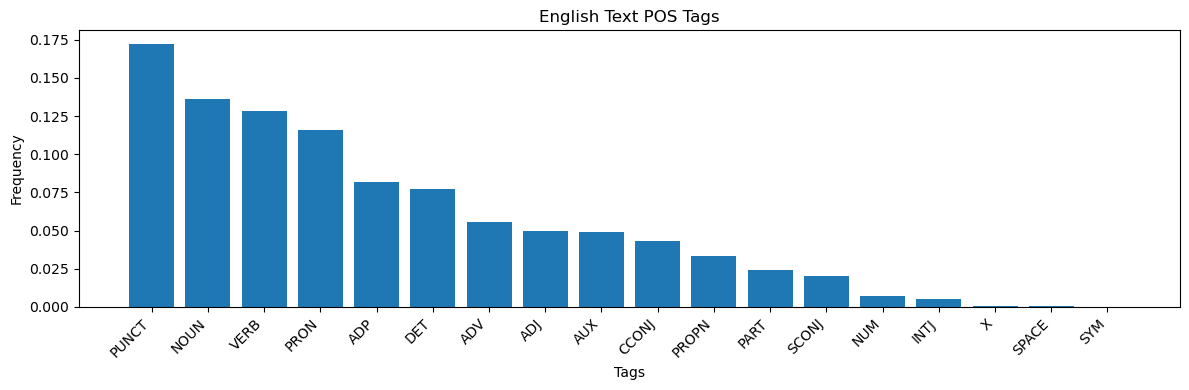

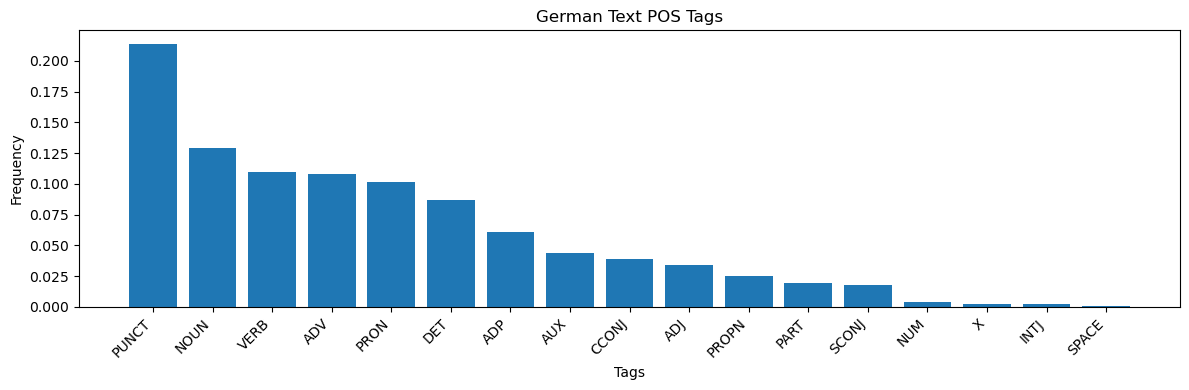

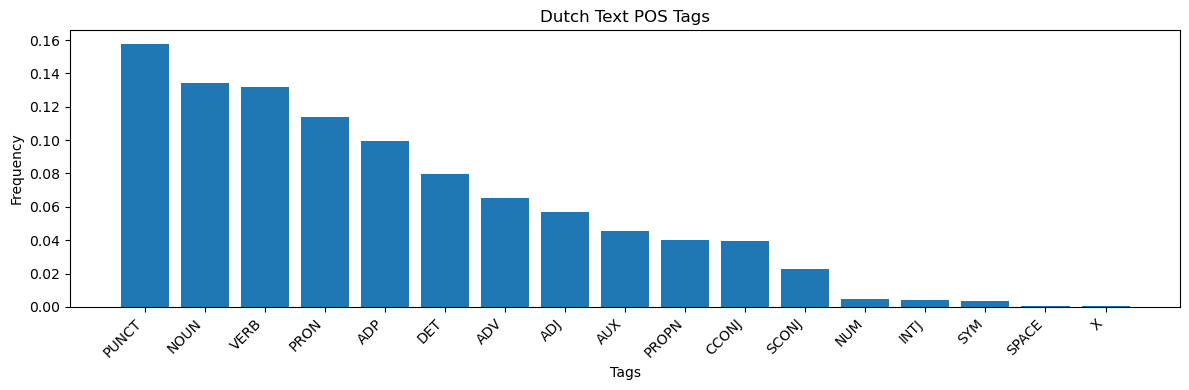

(None, None)

In [29]:
# Defining function to plot POS tags on a histogram
def get_pos_hist(dictionary, title, file_name):
    words = list(dictionary.keys())
    frequencies = list(dictionary.values())
    
    plt.figure(figsize=(12, 4))
    plt.bar(words, frequencies)
    plt.title(title)
    plt.xlabel("Tags")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    filepath = os.path.join("Figures", file_name)
    
    return (plt.savefig(filepath), plt.show())

# Applying the function
get_pos_hist(dict(sorted(en_freq.items(), key=lambda x: x[1], reverse=True)), "English Text POS Tags", "fig19")
get_pos_hist(dict(sorted(de_freq.items(), key=lambda x: x[1], reverse=True)), "German Text POS Tags", "fig20")
get_pos_hist(dict(sorted(nl_freq.items(), key=lambda x: x[1], reverse=True)), "Dutch Text POS Tags", "fig21")

Markdown to report on findings

## Part 2

On the data for Part I (1+2), perform Named Entity Recognition using spacy. Annotate a small data set of 1-2 sentences per text with named entity categories. (The sentences are supposed to include names of characters, places and other entities.)

How good or bad is the performance of the automatic method on the manually annotated text? Report Precision, Recall, F1 Score and discuss the results.

In [30]:
# Re-loading the English core
nlp = spacy.load("en_core_web_sm")

#### Text 1: Another plot? - Bones_Bard 

##### Automatic NER

In [31]:
# Text 1 automatic NER
doc = nlp(part1[0])
displacy.render(doc, style="ent")

##### Manual NER

"(Missy: PER) was sitting on a chair in a house, maps and papers spread around, normally her planning was mental, but (River: PER) had suggested a physical map to refer to and it was helpful. (River: PER) walked out of the bedroom. “The people who own this house really have no good clothes.” She was wearing a t-shirt that drenched her form, and some trousers that looked about the right size, (Missy: PER) smiled, still in her (Mary Poppins: PER) looking outfit, (River: PER) looked over at the maps."

#### Text 2: You’d looked me in my eyes and told me - Bones_Bard 

##### Automatic NER

In [32]:
# Text 2 automatic NER
doc = nlp(part1[1])
displacy.render(doc, style="ent")

##### Manual NER

"She sat in her bed, thinking over how she got here, her husband, a man, and occasionally women, she loved, who also made her want to slap him, he hadn’t known who she was, she thought back to something she once told her father, well, (the Doctor: PER) not knowing who she was had killed her. She took a book from her bedside table, she was surrounded by them these day, she whispered to herself. “It’s a bit boring with those trips, isn’t it.” She didn’t expect anyone to agree, and nobody did."

#### Text 3: I Want You Safe - Beegabbagabba 

##### Automatic NER

In [33]:
# Text 3 automatic NER
doc = nlp(part1[2])
displacy.render(doc, style="ent")

##### Manual NER

"(Rose Tyler: PER)." (Rassilon: PER), how he loved to say her name. "I was going to take you to so many places. (Barcelona: LOC). Not the city (Barcelona: LOC/GPE), the planet (Barcelona: LOC). You'd love it. Fantastic place! They've got dogs with no noses! Imagine how many times a day you end up tellin' that joke and it's still funny!"

#### Text 4: Even If the Language of Flowers is Dead, Roses Always Mean Love - aubreyplvr 

##### Automatic NER

In [34]:
# Text 4 automatic NER
doc = nlp(part1[3])
displacy.render(doc, style="ent")

##### Manual NER

"The TARDIS wasn’t meant to translate (Gallifreyan: LANG) to other languages. So, very early on, (The Doctor: PER) had adjusted some things so she could translate (Gallifreyan: LANG) to (English: LANG). The system had to be repaired regularly, but it was worth it for people like (Rose: PER)."

#### Text 5: WWTDD: What would the Doctor do? - aboutcustardcreams 

##### Automatic NER

In [35]:
# Text 5 automatic NER
doc = nlp(part1[4])
displacy.render(doc, style="ent")

##### Manual NER

"You didn’t mean to be away for long, however, spending some time alone allowed you to really focus on (the Doctor: PER)’s words. And you realized all this time she had been right. She was always right and it was annoying. You couldn’t rely on violence for whatever reason, so you made use of the time alone to fix yourself. You never thought you’d do that for anything or anyone, yet you were willing to change for her. You had a vortex manipulator to move around and that’s what you used to answer distress calls all over the (Universe: LOC)."